### Problem 1: Keypoint Detection

In [1]:
# Afshin Karimi
# No : 99210431
# HW4 Solutions

# import libraries 
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
import scipy.ndimage as ndi
import cv2 

img = imread('Boxes.png')
imggray = rgb2gray(img)

# Text colors class
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

Problem 1 Part a : 



(<matplotlib.axes._subplots.AxesSubplot at 0x7faea03779e8>,
 Text(0.5, 1.0, 'Gradient In Y direction'))

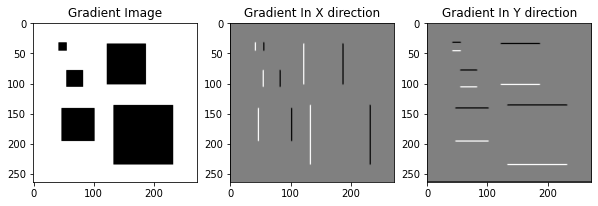

In [2]:
# Problem 1 Part a

# Compute the x and y derivatives on the image.
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

# visualization of gradients
print(f"{bcolors.HEADER}Problem 1 Part a : \n{bcolors.OKBLUE}")
results = [imggray,I_x,I_y]
images =["Gradient Image","Gradient In X direction","Gradient In Y direction"]
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(results[0],'gray'),plt.title(images[0])
plt.subplot(132),plt.imshow(results[1],'gray'),plt.title(images[1])
plt.subplot(133),plt.imshow(results[2],'gray'),plt.title(images[2])

In [3]:
# Problem 1 Part b

# Compute the covariance matrix
Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)

# determinant
detH = Ixx * Iyy - Ixy ** 2
# trace
traceH = Ixx + Iyy

# Problem 1 Part c
k = 0.05

# landa_min = detH / traceH
harris_response = detH - k * traceH ** 2
# Compute the Harris response
#harris_response = detH / traceH 
print(f"{bcolors.HEADER}Problem 1 Part b & c : \n{bcolors.OKCYAN}")
print(f'Harris Response = \n{harris_response}\n')

Problem 1 Part b & c : 

Harris Response = 
[[29.89506928 19.89764014  0.92068236 ...  0.92068236 19.89764014
  29.89506928]
 [19.89764014 12.97283096  2.25742172 ...  2.25742172 12.97283096
  19.89764014]
 [ 0.92068236  2.25742172  0.6628111  ...  0.6628111   2.25742172
   0.92068236]
 ...
 [ 0.92068236  2.25742172  0.6628111  ...  0.6628111   2.25742172
   0.92068236]
 [19.89764014 12.97283096  2.25742172 ...  2.25742172 12.97283096
  19.89764014]
 [29.89506928 19.89764014  0.92068236 ...  0.92068236 19.89764014
  29.89506928]]



In [4]:
# calculate the sum of squares of our gradient at each pixel
offset=0
for y in range(offset, imggray.shape[1]):
    for x in range(offset, imggray.shape[0]):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

# Find determinant and trace, use to get corner response
k = 0.05
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

In [5]:
# Problem 1 Part d
# Find peaks in the response that are above the threshold
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

print(f"{bcolors.HEADER}Problem 1 Part d : \n{bcolors.OKGREEN}")
print(f'corners = \n{img_copy_for_corners}\n')
print(f'{bcolors.OKCYAN}edges = \n{img_copy_for_edges}\n')

Problem 1 Part d : 

corners = 
[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]

edges = 
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255

Problem 1 Part e : 

image after using Harris corners detection : 



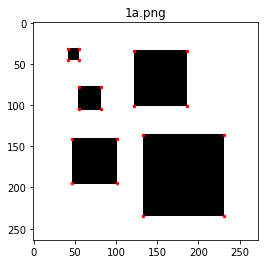

In [7]:
# Problem 1 Part e
import skimage.feature as sf
corners = sf.corner_peaks(harris_response)
print(f"{bcolors.HEADER}Problem 1 Part e : \n{bcolors.OKBLUE}")
print(f'image after using Harris corners detection : \n')
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=5)
plt.title('1a.png')
plt.savefig('1a.png')

Problem 1 Part f : 

Rainier1.png & 1b.png (detected corners): 



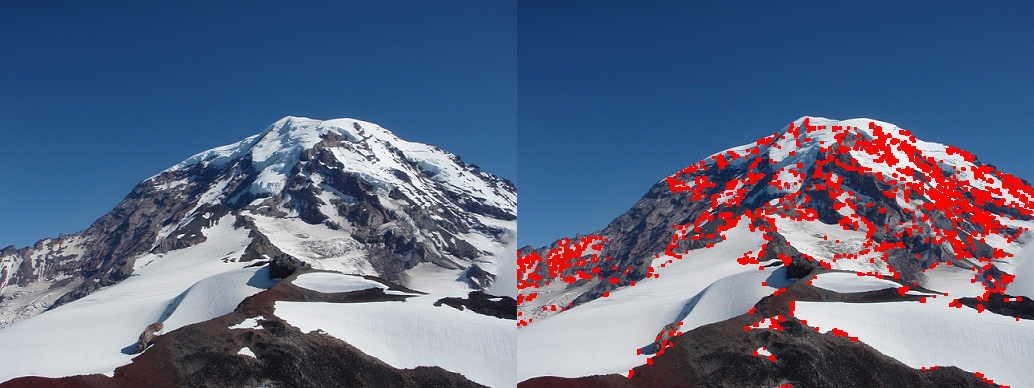

In [ ]:
# Problem 1 Part f
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('Rainier1.png')
Rainier1=cv2.imread('Rainier1.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners
dst = cv2.dilate(dst,None)

# Threshold for an optimal value
img[dst>0.01*dst.max()]=[0,0,255]
print(f"{bcolors.HEADER}Problem 1 Part f : \n{bcolors.OKCYAN}")
print(f'Rainier1.png & 1b.png (detected corners): \n')
numpy_horizontal_concat = np.concatenate((Rainier1, img), axis=1)
cv2_imshow(numpy_horizontal_concat)

cv2.imwrite('1b.png',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

Problem 1 Part f : 

Rainier2.png & 1c.png (detected corners): 



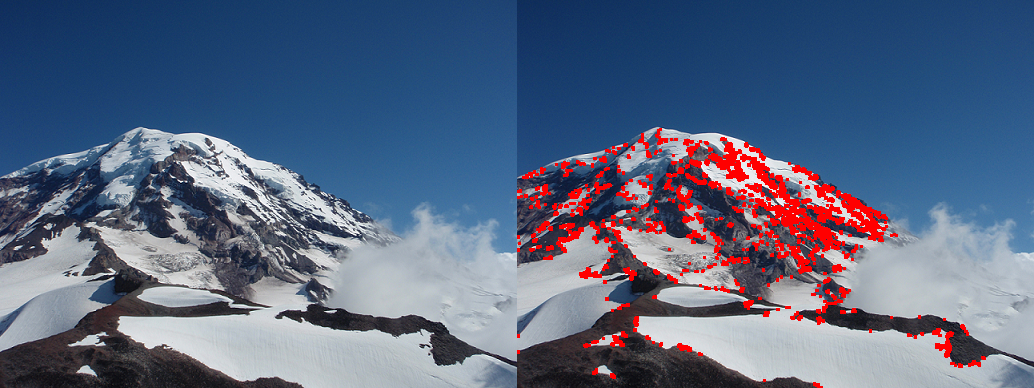

In [ ]:
# Problem 1 Part f

img = cv2.imread('Rainier2.png')
Rainier2=cv2.imread('Rainier2.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners
dst = cv2.dilate(dst,None)

# Threshold for an optimal value
img[dst>0.01*dst.max()]=[0,0,255]
print(f"{bcolors.HEADER}Problem 1 Part f : \n{bcolors.OKCYAN}")
print(f'Rainier2.png & 1c.png (detected corners): \n')
numpy_horizontal_concat = np.concatenate((Rainier2, img), axis=1)
cv2_imshow(numpy_horizontal_concat)

cv2.imwrite('1c.png',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

### Problem 2: Keypoint Matching

In [ ]:
# Problem 2 Solution Part a,b,c,d,e
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import sys , os , random
import cv2
from numpy.lib.stride_tricks import as_strided

img1 = cv2.imread('Rainier1.png',cv2.IMREAD_GRAYSCALE)          
img2 = cv2.imread('Rainier2.png',cv2.IMREAD_GRAYSCALE)
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

Problem 2 : 

ORB Descriptor (Top 20 matches): 



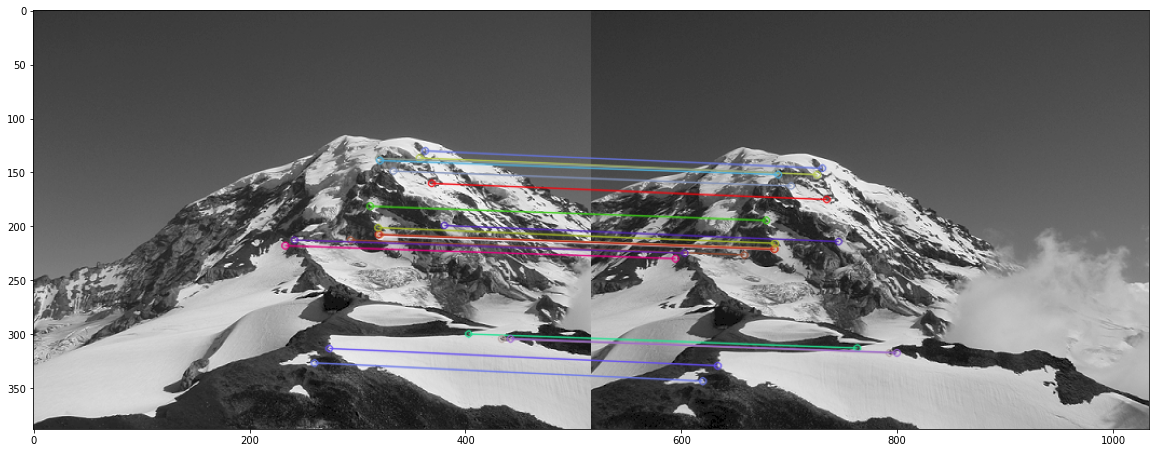

(<matplotlib.image.AxesImage at 0x7f92b7f7a630>, None)

In [ ]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 20 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,15))
print(f"{bcolors.HEADER}Problem 2 Part a: \n{bcolors.OKCYAN}")
print(f'ORB Descriptor (Top 20 matches): \n')
plt.imshow(img3),plt.show()

In [ ]:
def sliding_window(arr, window_size):
    """ Construct a sliding window view of the array"""
    arr = np.asarray(arr)
    window_size = int(window_size)
    if arr.ndim != 2:
        raise ValueError("need 2-D input")
    if not (window_size > 0):
        raise ValueError("need a positive window size")
    shape = (arr.shape[0] - window_size + 1,
             arr.shape[1] - window_size + 1,
             window_size, window_size)
    if shape[0] <= 0:
        shape = (1, shape[1], arr.shape[0], shape[3])
    if shape[1] <= 0:
        shape = (shape[0], 1, shape[2], arr.shape[1])
    strides = (arr.shape[1]*arr.itemsize, arr.itemsize,
               arr.shape[1]*arr.itemsize, arr.itemsize)
    return as_strided(arr, shape=shape, strides=strides)

In [ ]:
def harrisfeature ( image ) :
	global TOTAL_FEATURES
	global WINDOW_SIZE #size of mask
	global HARRIS_CORNER_THRESHOLD
 
	width = image.shape[1]
	height = image.shape[0]
 
	R_final = np.zeros( ( height,width ), float)
	R_supressed_final = np.zeros( ( height,width ), float)
 
	#order of derivative in x
	order_x = 1
	#order of derivative in y
	order_y = 1
	#using 3x3 sobel operator
	aperturesize = 3 
	
	#grey_scale_image
	gray_scale_image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
	image_der_x = cv2.Sobel(gray_scale_image1,cv2.CV_64F,order_x,0,aperturesize)
	image_der_y = cv2.Sobel(gray_scale_image1,cv2.CV_64F,0,order_y,aperturesize)
 
	windows_x = sliding_window(image_der_x, WINDOW_SIZE)
	windows_y = sliding_window(image_der_y, WINDOW_SIZE)
 
	ix = (windows_x * windows_x)/WINDOW_SIZE
	iy = (windows_y * windows_y)/WINDOW_SIZE
	ixy = (windows_x * windows_y)/WINDOW_SIZE
 
	Ix = ix.sum(axis=-1).sum(axis=-1)
	Iy = iy.sum(axis=-1).sum(axis=-1)
	Ixy = ixy.sum(axis=-1).sum(axis=-1)
 
	C = np.vstack(([Ix.T], [Ixy.T], [Ixy.T], [Iy.T])).T
	C_reshaped =  C.reshape(1,-1,2,2)
	U, s, V = np.linalg.svd(C_reshaped, full_matrices=True)
 
	#Sum and product of eigen values
	sum_ =  s.sum(axis=-1)
	prod =  s.prod(axis=-1)
 
	Response = (prod - 0.04*np.power((sum_) , 2)).reshape(-1) 
	Reshaped_Response = Response.reshape(height - WINDOW_SIZE + 1,width - WINDOW_SIZE + 1)  
	R_final[int(WINDOW_SIZE/2):height - (int(WINDOW_SIZE/2)) , int(WINDOW_SIZE/2):width - (int(WINDOW_SIZE/2))] \
	= Reshaped_Response
 
	R_feature = sliding_window(R_final, WINDOW_SIZE)
	R_max = R_feature.max(axis=-1).max(axis=-1)
	
	Reshaped_Response[R_max>Reshaped_Response] = 0
	R_supressed_final[int(WINDOW_SIZE/2):height - (int(WINDOW_SIZE/2)) , int(WINDOW_SIZE/2):width - (int(WINDOW_SIZE/2))]\
	= Reshaped_Response
	features = np.column_stack(np.where(R_supressed_final>HARRIS_CORNER_THRESHOLD))
 
	return features

In [ ]:
def getNeighbours(image,features):
	global size
	gray_scale_image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	windowed_image = sliding_window( gray_scale_image1 , size )
	
	features_x = features[:,0]
	features_y = features[:,1]
 
	desired_features_x = (features_x<(gray_scale_image1.shape[0]-size)) & (features_x > size)
	desired_features_y = (features_y<(gray_scale_image1.shape[1]-size)) & (features_y > size )
	desired_features = np.logical_and(desired_features_x,desired_features_y) 
	
	desired_features = features[desired_features]
	
	neighbors =  windowed_image[desired_features[:,0],desired_features[:,1]]
	return desired_features, neighbors

In [ ]:
def ssd_(neighbors_set,desired_features_set):
	global size
 
	neighbors_1 = neighbors_set[0]
	neighbors_2 = neighbors_set[1]
 
	subs = (neighbors_2 - neighbors_1[:,None])
	squre_of_subs = subs**2
	average_of_squares = ((squre_of_subs.sum(axis = -1)).sum(axis = -1))/(size*size)
	matches = np.argmin(average_of_squares, axis=-1)
	
	matching_score = np.sort(average_of_squares,axis=-1)[:,:2]
	ratio = np.true_divide(matching_score[:,0],matching_score[:,1])
 
	invalid_matches = np.logical_or(matching_score[:,0]>SSD_THRESHOLD,ratio>SSD_RATIO_THRESHOLD)
 
	matching_score[invalid_matches] = -1
	matches[invalid_matches] = -1
 
	return matches, matching_score[0]

Problem 2 : 

harris_corner: 



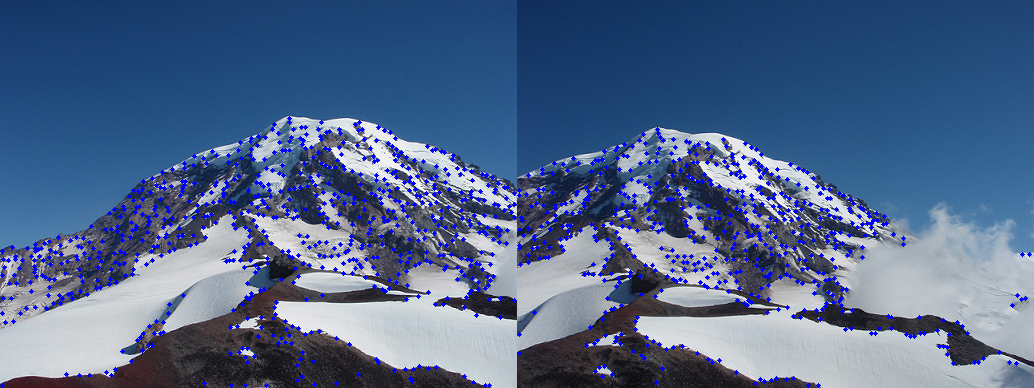

harris_corner_desired: 



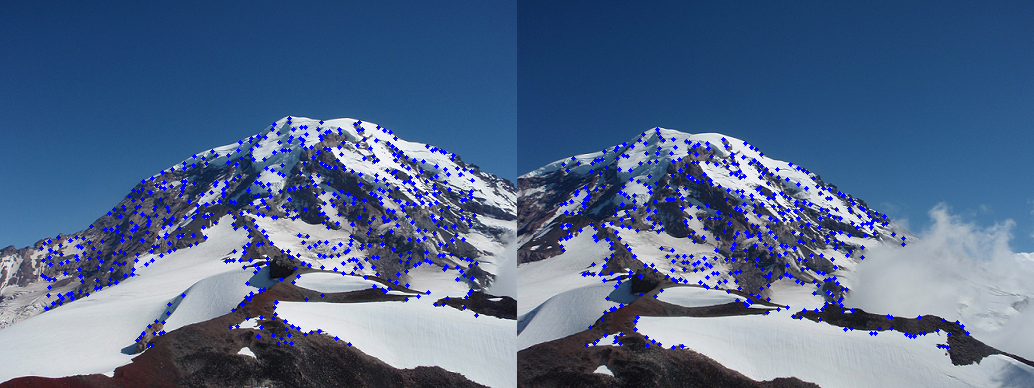

ssd_image without using RANSAC: 



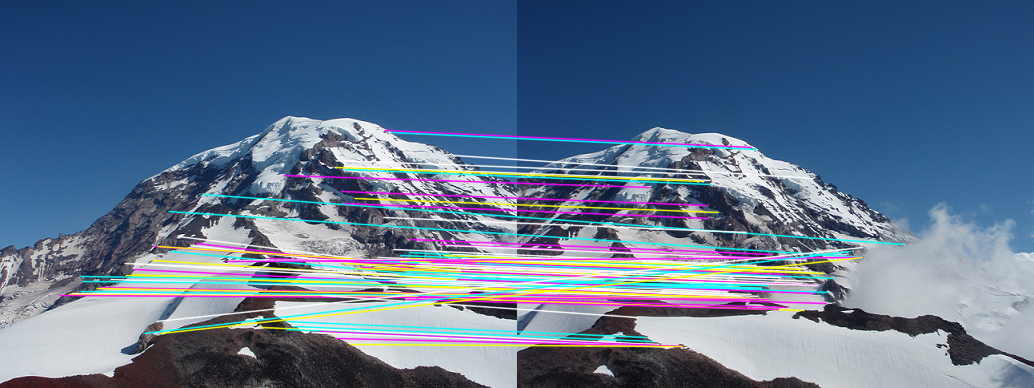

True

In [ ]:
# Main()
SSD_THRESHOLD = 80
SSD_RATIO_THRESHOLD = 0.95
 
HARRIS_CORNER_THRESHOLD = 4e8
 
WINDOW_SIZE = 5
TOTAL_FEATURES = 200
size = 40


image =[]
features_set = []
desired_features_set =[]
neighbors_set = []
image.append(cv2.imread('Rainier1.png'))
image.append(cv2.imread('Rainier2.png'))


#Assuming two image widths and heights are same
width = image[0].shape[1]
height = image[0].shape[0]

harris_corner = np.zeros((height , len(image)*width  ,3) ,np.uint8)
harris_corner_desired = np.zeros((height , len(image)*width  ,3) ,np.uint8)
full_image = np.zeros((height , len(image)*width  ,3) ,np.uint8)

for i in range(len(image)):
  features = harrisfeature(image[i])

  desired_features, neighbors = getNeighbours( image[i] , features )
  
  features_set.append(features)
  desired_features_set.append(desired_features)
  neighbors_set.append(neighbors)

  full_image[0:height , i*width : (i + 1)*width , :] = image[i]

  harris_corner[0:height , i*width : (i + 1)*width , :] = image[i]
  for j in range ( features.shape[0]  ) :
    cv2.circle ( harris_corner , ( (i*width)+features.item(j,1) , features.item(j,0)) , 0 , (255 , 0 , 0) , 4)

  harris_corner_desired[0:height , i*width : (i + 1)*width , :] = image[i]
  for j in range ( desired_features.shape[0]  ) :
    cv2.circle ( harris_corner_desired , ( (i*width)+desired_features.item(j,1) , desired_features.item(j,0)) , 0 , (255 , 0 , 0) , 4)

print(f"{bcolors.HEADER}Problem 2 part b & C & d & e: \n{bcolors.OKCYAN}")
print(f'harris_corner: \n')
cv2_imshow( harris_corner)
print(f"{bcolors.HEADER}harris_corner_desired: \n{bcolors.OKCYAN}")
cv2_imshow( harris_corner_desired)

ssd_image = full_image

matches_1, matching_score_1 = ssd_(neighbors_set,desired_features_set)

for i in range ( len ( matches_1 ) ) :
  match = matches_1.item(i)
  if match != -1:
    cv2.line(ssd_image , ((desired_features_set[0]).item(i,1) , (desired_features_set[0]).item(i,0)), \
      ((desired_features_set[1]).item(match,1)+width , (desired_features_set[1]).item(match,0)), \
      (255*( i%4) ,255*(( i+1)%4) , 255*(( i+2)%4) ) , 1 , cv2.LINE_AA, 0)
print(f"{bcolors.HEADER}ssd_image without using RANSAC: \n{bcolors.OKCYAN}")
cv2_imshow( ssd_image)
cv2.imwrite('2a.png', ssd_image)

Problem 2 Part f

Number of matches: 268
Number of inliers: 244


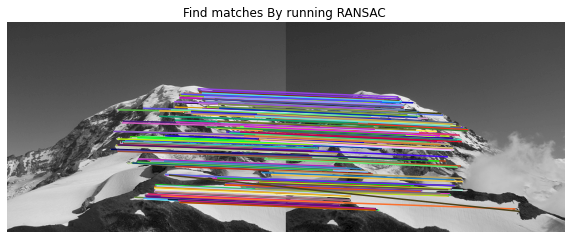


Here we see just correct matches.
all the incorrect matches from the previous step have been removed.


In [ ]:
# Problem 2 part f
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, ORB, plot_matches
from skimage.measure import ransac
from skimage.transform import FundamentalMatrixTransform
import matplotlib.pyplot as plt

np.random.seed(0)

img_left, img_right = map(rgb2gray, (img1, img2))

# Find sparse feature correspondences between left and right image.

descriptor_extractor = ORB()

descriptor_extractor.detect_and_extract(img_left)
keypoints_left = descriptor_extractor.keypoints
descriptors_left = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_right)
keypoints_right = descriptor_extractor.keypoints
descriptors_right = descriptor_extractor.descriptors

matches = match_descriptors(descriptors_left, descriptors_right,
                            cross_check=True)

# Estimate the epipolar geometry between the left and right image.

model, inliers = ransac((keypoints_left[matches[:, 0]],
                         keypoints_right[matches[:, 1]]),
                        FundamentalMatrixTransform, min_samples=8,
                        residual_threshold=1, max_trials=5000)

inlier_keypoints_left = keypoints_left[matches[inliers, 0]]
inlier_keypoints_right = keypoints_right[matches[inliers, 1]]

print(f"{bcolors.BOLD}Problem 2 Part f\n")
print(f"{bcolors.HEADER}Number of matches: {matches.shape[0]}")
print(f"{bcolors.OKBLUE}Number of inliers: {inliers.sum()}")

# Visualize the results.

fig, ax = plt.subplots(nrows=1, ncols=1)

plt.gray()

plot_matches(ax, img_left, img_right, keypoints_left, keypoints_right,
             matches[inliers], only_matches=True)
ax.axis("off")
fig.frameon=False
ax.set_title("Find matches By running RANSAC ")
fig.set_figwidth(10)
plt.savefig('2b.png')
plt.show()
print(f"""\n{bcolors.OKCYAN}Here we see just correct matches.
all the incorrect matches from the previous step have been removed.""")


### Problem 3: Image Stitching


In [ ]:
# Problem 3
# Load our images
img1 = cv2.imread("Rainier1.png")
img2 = cv2.imread("Rainier2.png")

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


In [ ]:
# Create our ORB detector and detect keypoints and descriptors
orb = cv2.ORB_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

In [ ]:
# Create a BFMatcher object.
# It will find all of the matching keypoints on two images
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)

# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)

In [ ]:
def draw_matches(img1, keypoints1, img2, keypoints2, matches):
  r, c = img1.shape[:2]
  r1, c1 = img2.shape[:2]

  # Create a blank image with the size of the first image + second image
  output_img = np.zeros((max([r, r1]), c+c1, 3), dtype='uint8')
  output_img[:r, :c, :] = np.dstack([img1, img1, img1])
  output_img[:r1, c:c+c1, :] = np.dstack([img2, img2, img2])

  # Go over all of the matching points and extract them
  for match in matches:
    img1_idx = match.queryIdx
    img2_idx = match.trainIdx
    (x1, y1) = keypoints1[img1_idx].pt
    (x2, y2) = keypoints2[img2_idx].pt

    # Draw circles on the keypoints
    cv2.circle(output_img, (int(x1),int(y1)), 4, (0, 255, 255), 1)
    cv2.circle(output_img, (int(x2)+c,int(y2)), 4, (0, 255, 255), 1)

    # Connect the same keypoints
    cv2.line(output_img, (int(x1),int(y1)), (int(x2)+c,int(y2)), (0, 255, 255), 1)
    
  return output_img

In [ ]:
all_matches = []
for m, n in matches:
  all_matches.append(m)

# img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# cv2_imshow(img3)

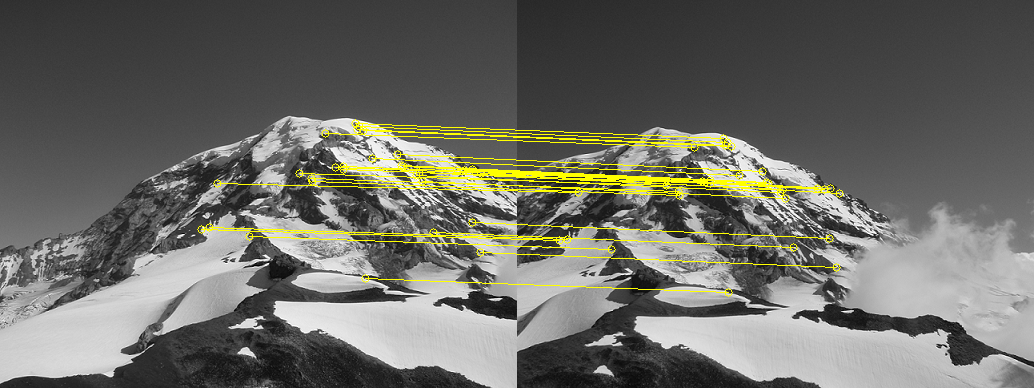

In [ ]:
# Finding the best matches
good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, good[:30])
cv2_imshow(img3)

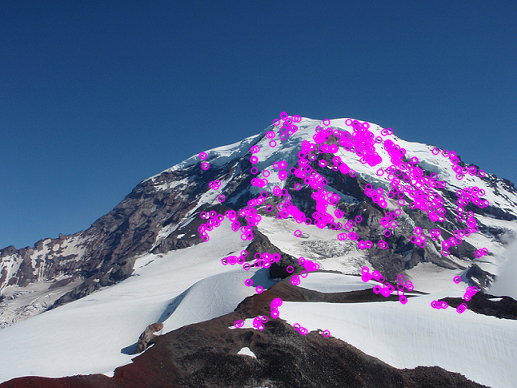

In [ ]:
cv2_imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))

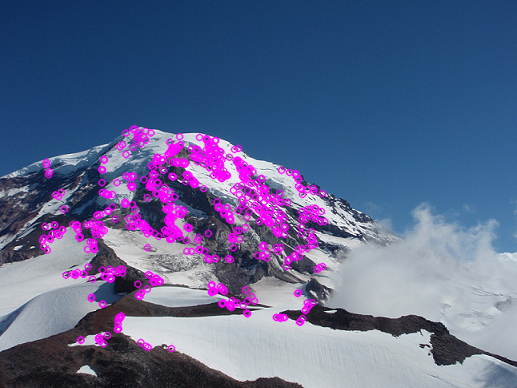

In [ ]:
cv2_imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))

In [ ]:
def warpImages(img1, img2, H):

  rows1, cols1 = img1.shape[:2]
  rows2, cols2 = img2.shape[:2]

  list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
  temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)

  # When we have established a homography we need to warp perspective
  # Change field of view
  list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

  list_of_points = np.concatenate((list_of_points_1,list_of_points_2), axis=0)

  [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
  [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
  
  translation_dist = [-x_min,-y_min]
  
  H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

  output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max-x_min, y_max-y_min))
  output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = img1

  return output_img

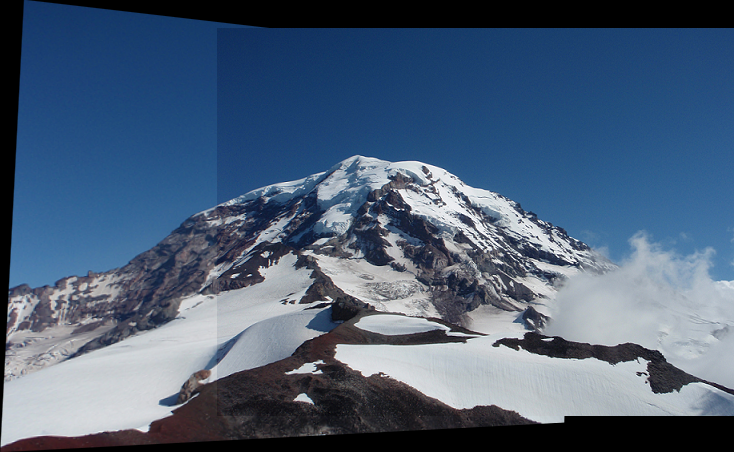

In [ ]:
# Set minimum match condition
MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    
    result = warpImages(img2, img1, M)

    cv2_imshow(result)

### Problem 4: Panorama

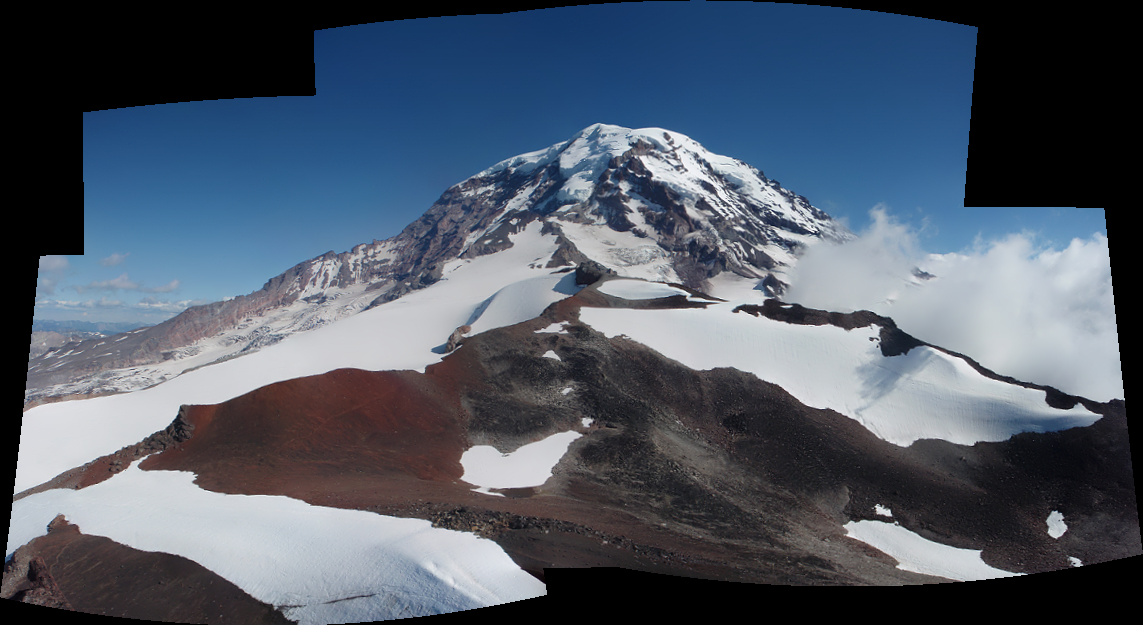

In [ ]:
# Problem 4 Part a
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread("Rainier1.png")
img2 = cv2.imread("Rainier2.png")
img3 = cv2.imread("Rainier3.png")
img4 = cv2.imread("Rainier4.png")
img5 = cv2.imread("Rainier5.png")
img6 = cv2.imread("Rainier6.png")

stitcher=cv2.Stitcher.create()
(status,result)=stitcher.stitch((img1,img2,img3,img4,img5,img6))
cv2_imshow(result)

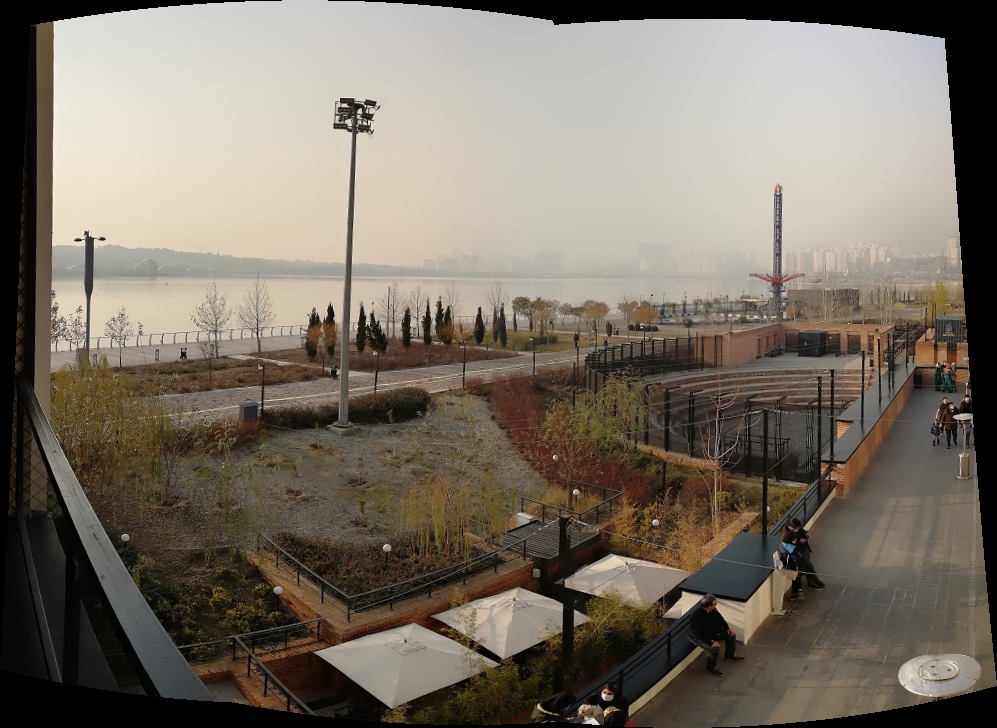

In [ ]:
# Problem 4 Part b

img1 = cv2.imread("1.jpg")
img2 = cv2.imread("2.jpg")
img3 = cv2.imread("3.jpg")
img4 = cv2.imread("4.jpg")
stitcher=cv2.Stitcher.create()
(status,result)=stitcher.stitch((img1,img2,img3,img4))
cv2_imshow(result)